<a href="https://colab.research.google.com/github/AdelSobhy/Uneeq-ML/blob/main/Uneeq_Task3_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Needed Libs

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing the Dataset and quickly cleaning it

In [138]:
df=pd.read_csv('/content/drive/MyDrive/ML/Twitter_Data.csv')
df.head() # 1: Positive 0: Neutral -1: Negative
df=df.dropna()

In [139]:
df['clean_text']=df['clean_text'].astype(str)

In [140]:
df['text length'] = df['clean_text'].apply(len)

In [141]:
df.head(10)

,clean_text,category,text length
0,when modi promised “minimum government maximum...,-1.0,210
1,talk all the nonsense and continue all the dra...,0.0,68
2,what did just say vote for modi welcome bjp t...,1.0,117
3,asking his supporters prefix chowkidar their n...,1.0,212
4,answer who among these the most powerful world...,1.0,81
5,kiya tho refresh maarkefir comment karo,0.0,40
6,surat women perform yagna seeks divine grace f...,0.0,76
7,this comes from cabinet which has scholars lik...,0.0,84
8,with upcoming election india saga going import...,1.0,156
9,gandhi was gay does modi,1.0,26


# Data Visualization

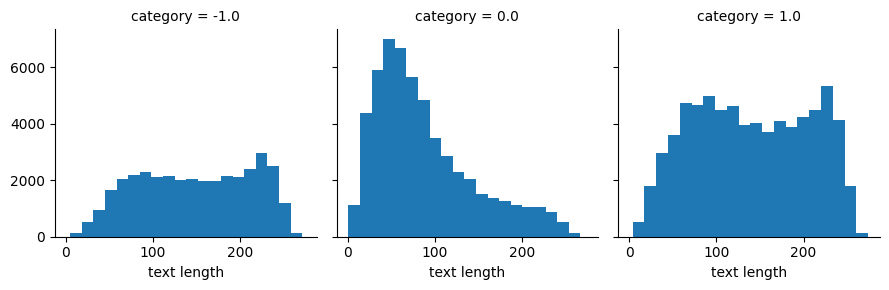

In [142]:
sns.FacetGrid(df,col='category').map(plt.hist,'text length',bins=20)

# Importing Needed Libraries

In [152]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Removing Stop Words to imporve Accuracy

In [153]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  words = text.split()
  filtered_words = [word for word in words if word.lower() not in stop_words]
  return ' '.join(filtered_words)

In [155]:
df['clean_text'] = df['clean_text'].apply(remove_stopwords)

In [156]:
X = df['clean_text']
y = df['category']

# Vectorizing our text

In [157]:
cv = CountVectorizer()

In [158]:
X = cv.fit_transform(X)

In [159]:
X

<162969x106906 sparse matrix of type '<class 'numpy.int64'>'
	with 2204687 stored elements in Compressed Sparse Row format>

# Train/Test Split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

# Applying Multinomial Algorithm

In [161]:
nb=MultinomialNB()
nb.fit(X_train,y_train)
predictions=nb.predict(X_test)

#Applying Grid Search for even higher Accuracy

In [162]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {'alpha': [0.001,0.01,0.1, 0.5, 1.0, 2.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(nb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print(grid_search.best_params_)

# Evaluate the model with the best parameters
best_nb = grid_search.best_estimator_
predictions = best_nb.predict(X_test)
print(classification_report(y_test, predictions))

{'alpha': 0.1}
              precision    recall  f1-score   support

        -1.0       0.61      0.70      0.65     10691
         0.0       0.85      0.68      0.76     16644
         1.0       0.74      0.80      0.77     21556

    accuracy                           0.74     48891
   macro avg       0.73      0.73      0.72     48891
weighted avg       0.75      0.74      0.74     48891

